In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
animedata = pd.read_csv('./animeDB.csv')


In [3]:
animedata.head()

,id,rank,title,score,genre,episodes,members,rating
0,5114,1,b'Fullmetal Alchemist: Brotherhood',9.10,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",64,"3,159,505","{10: 970265, 9: 552532, 8: 282605, 7: 101408, ..."
1,41467,2,b'Bleach: Sennen Kessen-hen',9.07,"['Action', 'Adventure', 'Fantasy', 'Shounen']",13,"433,719","{10: 103518, 9: 53565, 8: 28173, 7: 9518, 6: 2..."
2,9253,3,b'Steins;Gate',9.07,"['Drama', 'Sci-Fi', 'Suspense', 'Psychological...",24,"2,426,942","{10: 616970, 9: 370426, 8: 193430, 7: 80248, 6..."
3,38524,4,b'Shingeki no Kyojin Season 3 Part 2',9.06,"['Action', 'Drama', 'Gore', 'Military', 'Survi...",10,"2,087,057","{10: 637285, 9: 469063, 8: 234557, 7: 75471, 6..."
4,51535,5,b'Shingeki no Kyojin: The Final Season - Kanke...,9.06,"['Action', 'Drama', 'Suspense', 'Gore', 'Milit...",2,"418,755","{10: 78657, 9: 38167, 8: 15738, 7: 5128, 6: 17..."


In [4]:
# check for duplicates
animedata.duplicated().sum()

5394

In [5]:
# remove duplicates
animedata.drop_duplicates(inplace=True)
animedata.duplicated().sum()

0

In [6]:
animedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17086 entries, 0 to 22479
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        17086 non-null  int64  
 1   rank      17086 non-null  object 
 2   title     17086 non-null  object 
 3   score     10612 non-null  float64
 4   genre     17086 non-null  object 
 5   episodes  17086 non-null  object 
 6   members   17086 non-null  object 
 7   rating    17086 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.2+ MB


In [7]:
# check for null values
animedata.isnull().sum()


id             0
rank           0
title          0
score       6474
genre          0
episodes       0
members        0
rating         0
dtype: int64

In [8]:
# check for - in rank
animedata[animedata['rank'] == '-']

,id,rank,title,score,genre,episodes,members,rating
18378,55016,-,b'Idol',8.84,['Music'],1,"17,725","{10: 5027, 9: 3341, 8: 2423, 7: 966, 6: 251, 5..."
18379,48653,-,b'Yoru ni Kakeru',8.36,['Music'],1,"17,972","{10: 3294, 9: 2614, 8: 2820, 7: 1453, 6: 492, ..."
18380,42984,-,b'Gotcha!',8.33,"['Fantasy', 'Music']",1,"28,335","{10: 5411, 9: 4134, 8: 4488, 7: 2669, 6: 1140,..."
18381,39112,-,b'Kawaki wo Ameku',8.32,['Music'],1,"27,958","{10: 5225, 9: 3835, 8: 4295, 7: 2266, 6: 988, ..."
18382,34240,-,b'Shelter (Music)',8.31,"['Sci-Fi', 'Music']",1,"318,628","{10: 52783, 9: 52291, 8: 57474, 7: 31098, 6: 1..."
...,...,...,...,...,...,...,...,...
22475,54623,-,b'Fushigi no Kuni no Succubus',NaN,"['Fantasy', 'Hentai']",?,894,"{10: 0, 9: 0, 8: 0, 7: 0, 6: 0, 5: 0, 4: 0, 3:..."
22476,53029,-,b'Gouzai Shi de Ai',NaN,"['Avant Garde', 'Erotica']",1,139,"{10: 2, 9: 0, 8: 0, 7: 2, 6: 4, 5: 7, 4: 11, 3..."
22477,9304,-,b'Happy Day',NaN,['Hentai'],1,674,"{10: 8, 9: 2, 8: 3, 7: 9, 6: 9, 5: 22, 4: 12, ..."
22478,20007,-,b'Hi Gekiga Ukiyoe Senya Ichiya',NaN,"['Action', 'Hentai']",1,718,"{10: 12, 9: 1, 8: 2, 7: 7, 6: 10, 5: 14, 4: 11..."


In [9]:
animedata['rank'] = animedata['rank'].replace('-', np.nan)

In [10]:
animedata['rank'].isnull().sum()

3962

In [11]:
# convert all rank to int
animedata['rank'] = animedata['rank'].astype(float)

In [12]:
# find the largest value in rank
animedata['rank'].max()

20026.0

In [13]:
# assign more than max value to null values
animedata['rank'] = animedata['rank'].replace(np.nan, 21000)

In [14]:
animedata

,id,rank,title,score,genre,episodes,members,rating
0,5114,1.0,b'Fullmetal Alchemist: Brotherhood',9.10,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",64,"3,159,505","{10: 970265, 9: 552532, 8: 282605, 7: 101408, ..."
1,41467,2.0,b'Bleach: Sennen Kessen-hen',9.07,"['Action', 'Adventure', 'Fantasy', 'Shounen']",13,"433,719","{10: 103518, 9: 53565, 8: 28173, 7: 9518, 6: 2..."
2,9253,3.0,b'Steins;Gate',9.07,"['Drama', 'Sci-Fi', 'Suspense', 'Psychological...",24,"2,426,942","{10: 616970, 9: 370426, 8: 193430, 7: 80248, 6..."
3,38524,4.0,b'Shingeki no Kyojin Season 3 Part 2',9.06,"['Action', 'Drama', 'Gore', 'Military', 'Survi...",10,"2,087,057","{10: 637285, 9: 469063, 8: 234557, 7: 75471, 6..."
4,51535,5.0,b'Shingeki no Kyojin: The Final Season - Kanke...,9.06,"['Action', 'Drama', 'Suspense', 'Gore', 'Milit...",2,"418,755","{10: 78657, 9: 38167, 8: 15738, 7: 5128, 6: 17..."
...,...,...,...,...,...,...,...,...
22475,54623,21000.0,b'Fushigi no Kuni no Succubus',NaN,"['Fantasy', 'Hentai']",?,894,"{10: 0, 9: 0, 8: 0, 7: 0, 6: 0, 5: 0, 4: 0, 3:..."
22476,53029,21000.0,b'Gouzai Shi de Ai',NaN,"['Avant Garde', 'Erotica']",1,139,"{10: 2, 9: 0, 8: 0, 7: 2, 6: 4, 5: 7, 4: 11, 3..."
22477,9304,21000.0,b'Happy Day',NaN,['Hentai'],1,674,"{10: 8, 9: 2, 8: 3, 7: 9, 6: 9, 5: 22, 4: 12, ..."
22478,20007,21000.0,b'Hi Gekiga Ukiyoe Senya Ichiya',NaN,"['Action', 'Hentai']",1,718,"{10: 12, 9: 1, 8: 2, 7: 7, 6: 10, 5: 14, 4: 11..."


In [15]:
# now we have no null values in rank
animedata['rank'].isnull().sum()

0

In [16]:
# fixing episodes
animedata['episodes'].isnull().sum()

0

In [17]:
# convert all episodes to int
# if there is a string in episodes, ignore it
animedata['episodes'] = pd.to_numeric(animedata['episodes'], errors='coerce')

In [18]:
animedata['episodes'].isnull().sum()

515

In [19]:
# show some rows with null values in episodes
animedata[animedata['episodes'].isnull()]

,id,rank,title,score,genre,episodes,members,rating
55,21,56.0,b'One Piece',8.69,"['Action', 'Adventure', 'Fantasy', 'Shounen']",NaN,"2,152,420","{10: 537745, 9: 254726, 8: 202299, 7: 117168, ..."
67,51019,68.0,b'Kimetsu no Yaiba: Katanakaji no Sato-hen',8.64,"['Action', 'Fantasy', 'Historical', 'Shounen']",NaN,"478,926","{10: 22758, 9: 20973, 8: 19371, 7: 7292, 6: 18..."
289,44042,290.0,b'Holo no Graffiti',8.25,['Comedy'],NaN,"51,893","{10: 7970, 9: 2092, 8: 2480, 7: 1680, 6: 709, ..."
380,235,381.0,b'Detective Conan',8.17,"['Adventure', 'Comedy', 'Mystery', 'Detective'...",NaN,"333,092","{10: 35903, 9: 32276, 8: 40851, 7: 27488, 6: 9..."
563,37822,564.0,b'Douluo Dalu 2nd Season',8.02,"['Action', 'Adventure', 'Fantasy', 'Supernatur...",NaN,"18,237","{10: 2004, 9: 1505, 8: 1912, 7: 972, 6: 422, 5..."
...,...,...,...,...,...,...,...,...
22035,52752,21000.0,b'Aoharu Snatch',5.65,['Hentai'],NaN,"1,692","{10: 43, 9: 19, 8: 22, 7: 41, 6: 94, 5: 62, 4:..."
22067,54015,21000.0,b'Goblin no Suana',5.60,"['Fantasy', 'Hentai']",NaN,"1,548","{10: 32, 9: 9, 8: 32, 7: 56, 6: 88, 5: 70, 4: ..."
22345,51663,21000.0,b'Pandemic',5.04,['Hentai'],NaN,"2,145","{10: 51, 9: 16, 8: 37, 7: 69, 6: 99, 5: 120, 4..."
22473,55003,21000.0,b'1LDK + JK Ikinari Doukyo? Micchaku!? Hatsu E...,NaN,['Hentai'],NaN,299,"{10: 0, 9: 0, 8: 0, 7: 0, 6: 0, 5: 0, 4: 0, 3:..."


In [20]:
# drop the episodes column
animedata.drop('episodes', axis=1, inplace=True)

In [21]:
animedata

,id,rank,title,score,genre,members,rating
0,5114,1.0,b'Fullmetal Alchemist: Brotherhood',9.10,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...","3,159,505","{10: 970265, 9: 552532, 8: 282605, 7: 101408, ..."
1,41467,2.0,b'Bleach: Sennen Kessen-hen',9.07,"['Action', 'Adventure', 'Fantasy', 'Shounen']","433,719","{10: 103518, 9: 53565, 8: 28173, 7: 9518, 6: 2..."
2,9253,3.0,b'Steins;Gate',9.07,"['Drama', 'Sci-Fi', 'Suspense', 'Psychological...","2,426,942","{10: 616970, 9: 370426, 8: 193430, 7: 80248, 6..."
3,38524,4.0,b'Shingeki no Kyojin Season 3 Part 2',9.06,"['Action', 'Drama', 'Gore', 'Military', 'Survi...","2,087,057","{10: 637285, 9: 469063, 8: 234557, 7: 75471, 6..."
4,51535,5.0,b'Shingeki no Kyojin: The Final Season - Kanke...,9.06,"['Action', 'Drama', 'Suspense', 'Gore', 'Milit...","418,755","{10: 78657, 9: 38167, 8: 15738, 7: 5128, 6: 17..."
...,...,...,...,...,...,...,...
22475,54623,21000.0,b'Fushigi no Kuni no Succubus',NaN,"['Fantasy', 'Hentai']",894,"{10: 0, 9: 0, 8: 0, 7: 0, 6: 0, 5: 0, 4: 0, 3:..."
22476,53029,21000.0,b'Gouzai Shi de Ai',NaN,"['Avant Garde', 'Erotica']",139,"{10: 2, 9: 0, 8: 0, 7: 2, 6: 4, 5: 7, 4: 11, 3..."
22477,9304,21000.0,b'Happy Day',NaN,['Hentai'],674,"{10: 8, 9: 2, 8: 3, 7: 9, 6: 9, 5: 22, 4: 12, ..."
22478,20007,21000.0,b'Hi Gekiga Ukiyoe Senya Ichiya',NaN,"['Action', 'Hentai']",718,"{10: 12, 9: 1, 8: 2, 7: 7, 6: 10, 5: 14, 4: 11..."


In [22]:
# convert all members to int
# convert 123,456 to 123456
animedata['members'] = animedata['members'].str.replace(',', '')
animedata['members'] = animedata['members'].astype(int)


In [23]:
animedata

,id,rank,title,score,genre,members,rating
0,5114,1.0,b'Fullmetal Alchemist: Brotherhood',9.10,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",3159505,"{10: 970265, 9: 552532, 8: 282605, 7: 101408, ..."
1,41467,2.0,b'Bleach: Sennen Kessen-hen',9.07,"['Action', 'Adventure', 'Fantasy', 'Shounen']",433719,"{10: 103518, 9: 53565, 8: 28173, 7: 9518, 6: 2..."
2,9253,3.0,b'Steins;Gate',9.07,"['Drama', 'Sci-Fi', 'Suspense', 'Psychological...",2426942,"{10: 616970, 9: 370426, 8: 193430, 7: 80248, 6..."
3,38524,4.0,b'Shingeki no Kyojin Season 3 Part 2',9.06,"['Action', 'Drama', 'Gore', 'Military', 'Survi...",2087057,"{10: 637285, 9: 469063, 8: 234557, 7: 75471, 6..."
4,51535,5.0,b'Shingeki no Kyojin: The Final Season - Kanke...,9.06,"['Action', 'Drama', 'Suspense', 'Gore', 'Milit...",418755,"{10: 78657, 9: 38167, 8: 15738, 7: 5128, 6: 17..."
...,...,...,...,...,...,...,...
22475,54623,21000.0,b'Fushigi no Kuni no Succubus',NaN,"['Fantasy', 'Hentai']",894,"{10: 0, 9: 0, 8: 0, 7: 0, 6: 0, 5: 0, 4: 0, 3:..."
22476,53029,21000.0,b'Gouzai Shi de Ai',NaN,"['Avant Garde', 'Erotica']",139,"{10: 2, 9: 0, 8: 0, 7: 2, 6: 4, 5: 7, 4: 11, 3..."
22477,9304,21000.0,b'Happy Day',NaN,['Hentai'],674,"{10: 8, 9: 2, 8: 3, 7: 9, 6: 9, 5: 22, 4: 12, ..."
22478,20007,21000.0,b'Hi Gekiga Ukiyoe Senya Ichiya',NaN,"['Action', 'Hentai']",718,"{10: 12, 9: 1, 8: 2, 7: 7, 6: 10, 5: 14, 4: 11..."


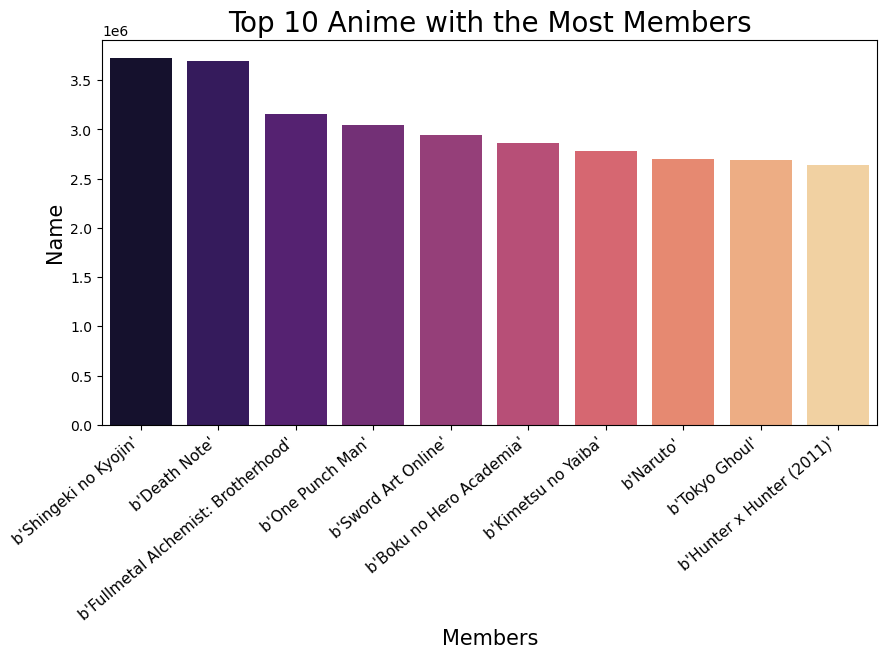

In [24]:
# plot top 10 anime with the most members
anime_members = animedata.dropna(axis = 0,subset=['members'])
anime_members = anime_members.sort_values(by=['members'], ascending=False)
anime_members = anime_members.head(10)

plt.figure(figsize=(10,5))
ax = sns.barplot(y='members', x='title', data=anime_members, palette='magma')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
plt.title('Top 10 Anime with the Most Members', fontsize=20)
plt.xlabel('Members', fontsize=15)
plt.ylabel('Name', fontsize=15)
plt.show()



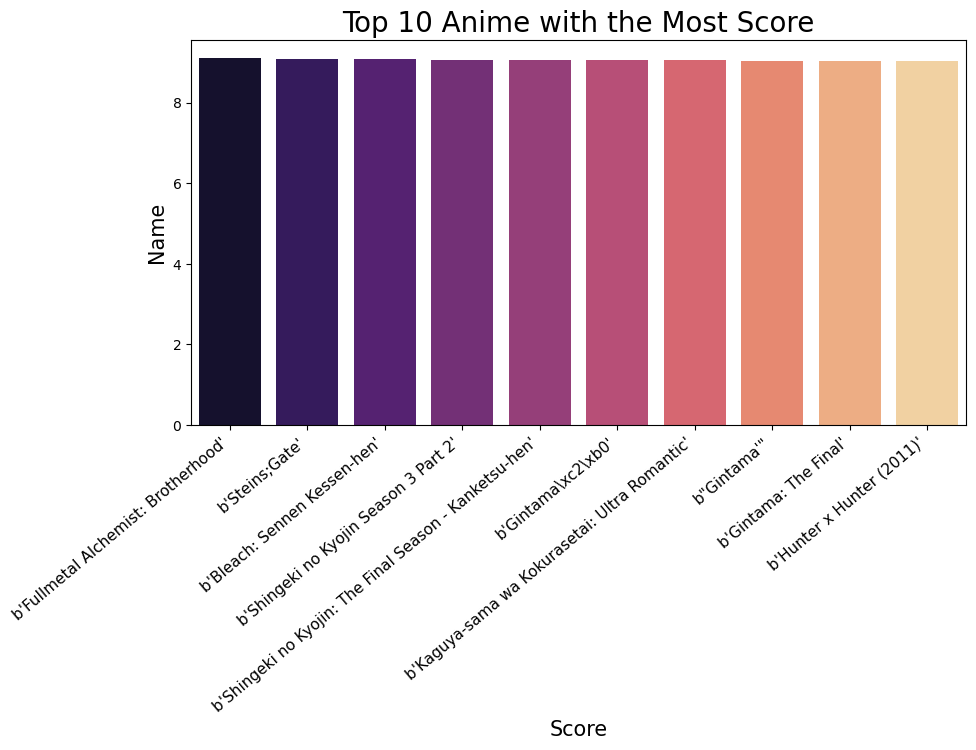

In [25]:
#  plot top 10 anime with the highest score
anime_members = animedata.dropna(axis = 0,subset=['score'])
anime_members = anime_members.sort_values(by=['score'], ascending=False)
anime_members = anime_members.head(10)

plt.figure(figsize=(10,5),dpi=100)
ax = sns.barplot(y='score', x='title', data=anime_members, palette='magma')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
plt.title('Top 10 Anime with the Most Score', fontsize=20)
plt.xlabel('Score', fontsize=15)
plt.ylabel('Name', fontsize=15)
plt.show()


In [94]:
# average out the rating
def ratingavg(ratings):
    # convert the numpy array to dictionary
    ratings = eval(ratings)
    print(ratings)
    sum = (ratings[1]+ratings[2]+ratings[3]+ratings[4]+ratings[5]+ratings[6]+ratings[7]+ratings[8]+ratings[9]+ratings[10])
    if sum == 0:
        return 0
    else: return (1*ratings[1]+2*ratings[2]+3*ratings[3]+4*ratings[4]+5*ratings[5]+6*ratings[6]+7*ratings[7]+8*ratings[8]+9*ratings[9]+10*ratings[10])/sum


In [95]:
# access dataframe by index
animedata['avg_rating'] = animedata['rating'].apply(ratingavg)

{10: 970265, 9: 552532, 8: 282605, 7: 101408, 6: 30217, 5: 14523, 4: 5220, 3: 2558, 2: 3177, 1: 47426}
{10: 103518, 9: 53565, 8: 28173, 7: 9518, 6: 2786, 5: 1193, 4: 679, 3: 358, 2: 765, 1: 5356}
{10: 616970, 9: 370426, 8: 193430, 7: 80248, 6: 29828, 5: 15707, 4: 7530, 3: 3465, 2: 2609, 1: 9296}
{10: 637285, 9: 469063, 8: 234557, 7: 75471, 6: 19999, 5: 7162, 4: 2798, 3: 1415, 2: 1112, 1: 11955}
{10: 78657, 9: 38167, 8: 15738, 7: 5128, 6: 1700, 5: 921, 4: 468, 3: 323, 2: 342, 1: 4203}
{10: 115847, 9: 53812, 8: 30843, 7: 14901, 6: 5670, 5: 3380, 4: 1403, 3: 943, 2: 1372, 1: 8387}
{10: 196426, 9: 137446, 8: 68347, 7: 20524, 6: 5326, 5: 2236, 4: 889, 3: 496, 2: 625, 1: 9927}
{10: 101450, 9: 62426, 8: 34350, 7: 13517, 6: 4440, 5: 2343, 4: 954, 3: 488, 2: 567, 1: 4275}
{10: 36787, 9: 11871, 8: 6180, 7: 2687, 6: 957, 5: 463, 4: 200, 3: 169, 2: 258, 1: 3219}
{10: 693488, 9: 494766, 8: 280206, 7: 110884, 6: 32502, 5: 13933, 4: 5102, 3: 2127, 2: 1600, 1: 6456}
{10: 85767, 9: 33133, 8: 15830, 7: 

In [96]:
animedata.drop('avg_rating', axis=1, inplace=True)

In [41]:
animedata

,id,rank,title,score,genre,members
0,5114,1.0,b'Fullmetal Alchemist: Brotherhood',9.10,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",3159505
1,41467,2.0,b'Bleach: Sennen Kessen-hen',9.07,"['Action', 'Adventure', 'Fantasy', 'Shounen']",433719
2,9253,3.0,b'Steins;Gate',9.07,"['Drama', 'Sci-Fi', 'Suspense', 'Psychological...",2426942
3,38524,4.0,b'Shingeki no Kyojin Season 3 Part 2',9.06,"['Action', 'Drama', 'Gore', 'Military', 'Survi...",2087057
4,51535,5.0,b'Shingeki no Kyojin: The Final Season - Kanke...,9.06,"['Action', 'Drama', 'Suspense', 'Gore', 'Milit...",418755
...,...,...,...,...,...,...
22475,54623,21000.0,b'Fushigi no Kuni no Succubus',0.00,"['Fantasy', 'Hentai']",894
22476,53029,21000.0,b'Gouzai Shi de Ai',0.00,"['Avant Garde', 'Erotica']",139
22477,9304,21000.0,b'Happy Day',0.00,['Hentai'],674
22478,20007,21000.0,b'Hi Gekiga Ukiyoe Senya Ichiya',0.00,"['Action', 'Hentai']",718


In [42]:
# removing none from score
animedata['score'] = animedata['score'].replace(np.nan, 0)

In [43]:
animedata

,id,rank,title,score,genre,members
0,5114,1.0,b'Fullmetal Alchemist: Brotherhood',9.10,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",3159505
1,41467,2.0,b'Bleach: Sennen Kessen-hen',9.07,"['Action', 'Adventure', 'Fantasy', 'Shounen']",433719
2,9253,3.0,b'Steins;Gate',9.07,"['Drama', 'Sci-Fi', 'Suspense', 'Psychological...",2426942
3,38524,4.0,b'Shingeki no Kyojin Season 3 Part 2',9.06,"['Action', 'Drama', 'Gore', 'Military', 'Survi...",2087057
4,51535,5.0,b'Shingeki no Kyojin: The Final Season - Kanke...,9.06,"['Action', 'Drama', 'Suspense', 'Gore', 'Milit...",418755
...,...,...,...,...,...,...
22475,54623,21000.0,b'Fushigi no Kuni no Succubus',0.00,"['Fantasy', 'Hentai']",894
22476,53029,21000.0,b'Gouzai Shi de Ai',0.00,"['Avant Garde', 'Erotica']",139
22477,9304,21000.0,b'Happy Day',0.00,['Hentai'],674
22478,20007,21000.0,b'Hi Gekiga Ukiyoe Senya Ichiya',0.00,"['Action', 'Hentai']",718


In [44]:
# converting rating column to dictionary
animedata['rating'] = animedata['rating'].apply(eval)


KeyError: 'rating'

Uncomment to extract more data

In [ ]:
output_file = 'anime_rating_sub.csv'
with open(output_file, 'w') as f:
    f.write('title,rating\n')

PermissionError: [Errno 13] Permission denied: 'anime_rating_sub.csv'

In [ ]:
import math
# Iterate over each row in animedata DataFrame
for index, row in animedata.iterrows():
    # Extract the rating dictionary from the 'rating' column
    rating_dict = row['rating']
    
    # Extract the title from the 'title' column
    title = row['title']
    
    # Write each rating and title pair to the file
    with open(output_file, 'a') as f:
        for key, value in rating_dict.items():
            for _ in range(math.ceil(value*0.03)):
                f.write(f"{title},{key}\n")

In [ ]:
anime_rating = pd.read_csv('anime_rating_sub.csv',on_bad_lines='skip')

In [ ]:
anime_rating

,title,rating
0,b'Fullmetal Alchemist: Brotherhood',10
1,b'Fullmetal Alchemist: Brotherhood',10
2,b'Fullmetal Alchemist: Brotherhood',10
3,b'Fullmetal Alchemist: Brotherhood',10
4,b'Fullmetal Alchemist: Brotherhood',10
...,...,...
12749985,b'Isaku: Tsumi to Batsu',5
12749986,b'Isaku: Tsumi to Batsu',4
12749987,b'Isaku: Tsumi to Batsu',3
12749988,b'Isaku: Tsumi to Batsu',2


In [ ]:
animedata.drop('rating', axis=1, inplace=True)

In [ ]:
merge_data = pd.merge(animedata, anime_rating, on='title')

In [ ]:
merge_data

,id,rank,title,score,genre,members,rating
0,5114,1.0,b'Fullmetal Alchemist: Brotherhood',9.1,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",3159505,10
1,5114,1.0,b'Fullmetal Alchemist: Brotherhood',9.1,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",3159505,10
2,5114,1.0,b'Fullmetal Alchemist: Brotherhood',9.1,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",3159505,10
3,5114,1.0,b'Fullmetal Alchemist: Brotherhood',9.1,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",3159505,10
4,5114,1.0,b'Fullmetal Alchemist: Brotherhood',9.1,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",3159505,10
...,...,...,...,...,...,...,...
12821149,43015,21000.0,b'Isaku: Tsumi to Batsu',0.0,['Hentai'],455,5
12821150,43015,21000.0,b'Isaku: Tsumi to Batsu',0.0,['Hentai'],455,4
12821151,43015,21000.0,b'Isaku: Tsumi to Batsu',0.0,['Hentai'],455,3
12821152,43015,21000.0,b'Isaku: Tsumi to Batsu',0.0,['Hentai'],455,2


In [ ]:
merge_data

,id,rank,title,score,genre,members,rating
0,5114,1.0,b'Fullmetal Alchemist: Brotherhood',9.1,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",3159505,10
1,5114,1.0,b'Fullmetal Alchemist: Brotherhood',9.1,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",3159505,10
2,5114,1.0,b'Fullmetal Alchemist: Brotherhood',9.1,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",3159505,10
3,5114,1.0,b'Fullmetal Alchemist: Brotherhood',9.1,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",3159505,10
4,5114,1.0,b'Fullmetal Alchemist: Brotherhood',9.1,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",3159505,10
...,...,...,...,...,...,...,...
12821149,43015,21000.0,b'Isaku: Tsumi to Batsu',0.0,['Hentai'],455,5
12821150,43015,21000.0,b'Isaku: Tsumi to Batsu',0.0,['Hentai'],455,4
12821151,43015,21000.0,b'Isaku: Tsumi to Batsu',0.0,['Hentai'],455,3
12821152,43015,21000.0,b'Isaku: Tsumi to Batsu',0.0,['Hentai'],455,2


In [ ]:
type(merge_data['rating'][0])

numpy.int64

Text(0.5, 1.0, 'Rating of users')

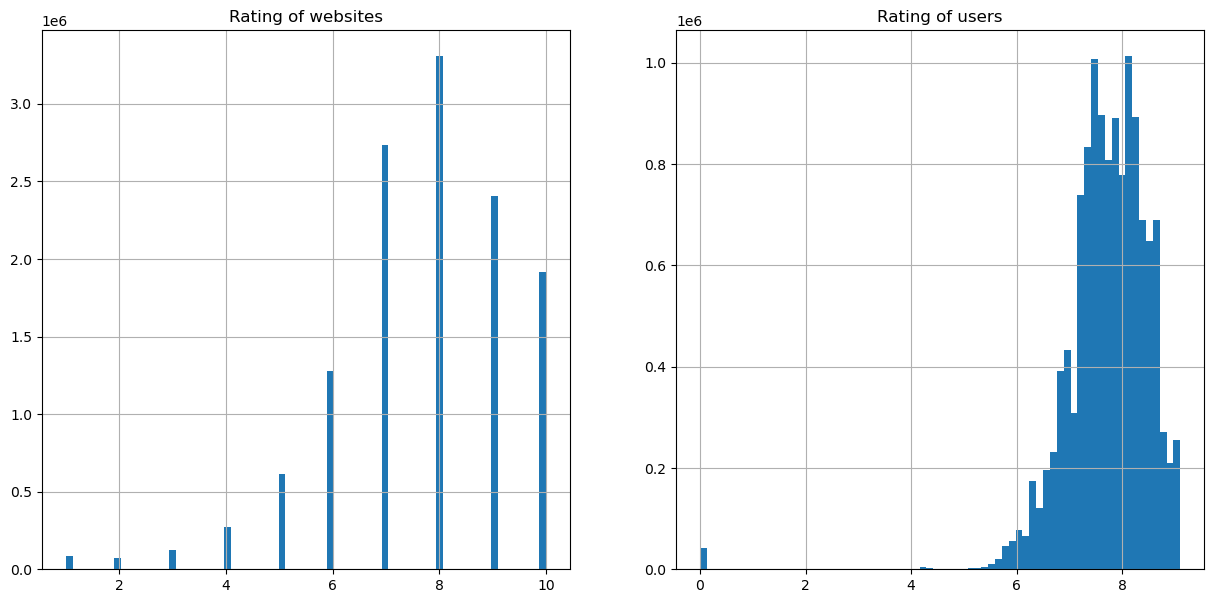

In [ ]:
#Distribution of ratings
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
merge_data['rating'].hist(bins=70)
plt.title("Rating of websites")
plt.subplot(1,2,2)
merge_data['score'].hist(bins=70)
plt.title("Rating of users")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
tf.fit(animedata['genre'])
tf.get_feature_names()

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action',
 'adult',
 'adventure',
 'anthropomorphic',
 'arts',
 'avant',
 'award',
 'boys',
 'cast',
 'cgdct',
 'childcare',
 'combat',
 'comedy',
 'crime',
 'crossdressing',
 'culture',
 'delinquents',
 'detective',
 'drama',
 'ecchi',
 'educational',
 'erotica',
 'fantasy',
 'female',
 'fi',
 'gag',
 'game',
 'garde',
 'girls',
 'gore',
 'gourmet',
 'harem',
 'hentai',
 'high',
 'historical',
 'horror',
 'humor',
 'idols',
 'isekai',
 'iyashikei',
 'josei',
 'kids',
 'life',
 'love',
 'magical',
 'mahou',
 'male',
 'martial',
 'mecha',
 'medical',
 'military',
 'music',
 'mystery',
 'mythology',
 'of',
 'organized',
 'otaku',
 'parody',
 'performing',
 'pets',
 'polygon',
 'power',
 'psychological',
 'racing',
 'reincarnation',
 'reverse',
 'romance',
 'romantic',
 'samurai',
 'school',
 'sci',
 'seinen',
 'sex',
 'shift',
 'shoujo',
 'shounen',
 'showbiz',
 'slice',
 'space',
 'sports',
 'stakes',
 'strategy',
 'subtext',
 'super',
 'supernatural',
 'survival',
 'suspense',
 'team'

In [ ]:
tfdf_matrix = tf.fit_transform(animedata['genre'])
tfdf_matrix.shape

(17086, 95)

In [ ]:
# tfdf_matrix = tf.fit_transform(merge_data['genre'])
# tfdf_matrix.shape

In [ ]:
genres = tf.get_feature_names()

In [ ]:
genres

['action',
 'adult',
 'adventure',
 'anthropomorphic',
 'arts',
 'avant',
 'award',
 'boys',
 'cast',
 'cgdct',
 'childcare',
 'combat',
 'comedy',
 'crime',
 'crossdressing',
 'culture',
 'delinquents',
 'detective',
 'drama',
 'ecchi',
 'educational',
 'erotica',
 'fantasy',
 'female',
 'fi',
 'gag',
 'game',
 'garde',
 'girls',
 'gore',
 'gourmet',
 'harem',
 'hentai',
 'high',
 'historical',
 'horror',
 'humor',
 'idols',
 'isekai',
 'iyashikei',
 'josei',
 'kids',
 'life',
 'love',
 'magical',
 'mahou',
 'male',
 'martial',
 'mecha',
 'medical',
 'military',
 'music',
 'mystery',
 'mythology',
 'of',
 'organized',
 'otaku',
 'parody',
 'performing',
 'pets',
 'polygon',
 'power',
 'psychological',
 'racing',
 'reincarnation',
 'reverse',
 'romance',
 'romantic',
 'samurai',
 'school',
 'sci',
 'seinen',
 'sex',
 'shift',
 'shoujo',
 'shounen',
 'showbiz',
 'slice',
 'space',
 'sports',
 'stakes',
 'strategy',
 'subtext',
 'super',
 'supernatural',
 'survival',
 'suspense',
 'team'

In [ ]:
tfdf_matrix.todense()

matrix([[0.32995748, 0.        , 0.35720414, ..., 0.        , 0.        ,
         0.        ],
        [0.45628203, 0.        , 0.4939601 , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.60507941, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
genre_pivot = pd.DataFrame(tfdf_matrix.todense(), columns=genres)
genre_pivot

,action,adult,adventure,anthropomorphic,arts,avant,award,boys,cast,cgdct,...,survival,suspense,team,time,travel,vampire,video,visual,winning,workplace
0,0.329957,0.0,0.357204,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.456282,0.0,0.493960,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.439094,0.0,0.483717,0.483717,0.0,0.0,0.0,0.0,0.0
3,0.233797,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.581448,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.209596,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.521260,0.443071,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17081,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
17082,0.000000,0.0,0.000000,0.0,0.0,0.495299,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
17083,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
17084,0.605079,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [55]:
# rating vs title with highest rating count
rating_max = merge_data.groupby('title')['rating'].max()
rating_df = pd.DataFrame({'title':rating_max.index, 'rating':rating_max.values})

temp = pd.merge(merge_data['title'], rating_df, on='title', how='inner')
grouped_df = merge_data.groupby(['title','rating']).size().reset_index(name='count')
grouped_df
# max_count = grouped_df['rating'].max()
# max_count
# temp
# rating_max
# make a dataframe with title and rating where title is the index


,title,rating,count
0,"b""90's Love (SQUAR Remix)""",1,1
1,"b""90's Love (SQUAR Remix)""",2,1
2,"b""90's Love (SQUAR Remix)""",3,1
3,"b""90's Love (SQUAR Remix)""",4,1
4,"b""90's Love (SQUAR Remix)""",5,1
...,...,...,...
144775,b'xxxHOLiC\xe2\x97\x86Kei',6,108
144776,b'xxxHOLiC\xe2\x97\x86Kei',7,336
144777,b'xxxHOLiC\xe2\x97\x86Kei',8,608
144778,b'xxxHOLiC\xe2\x97\x86Kei',9,506


In [56]:
# Max rating based on count
max_count_df = grouped_df.groupby('title')['count'].max().reset_index(name='max_count')
max_count_df

,title,max_count
0,"b""90's Love (SQUAR Remix)""",1
1,"b""A Doodlin' Song""",1
2,"b""Aesop's World""",2
3,"b""Akiba's Trip The Animation""",479
4,"b""An Atheist's Christmas""",1
...,...,...
16315,b'xxxHOLiC Movie: Manatsu no Yoru no Yume',319
16316,b'xxxHOLiC Rou',303
16317,b'xxxHOLiC Shunmuki',335
16318,b'xxxHOLiC',1073


In [57]:
temp = pd.merge(grouped_df, max_count_df, on='title', how='inner')
temp

,title,rating,count,max_count
0,"b""90's Love (SQUAR Remix)""",1,1,1
1,"b""90's Love (SQUAR Remix)""",2,1,1
2,"b""90's Love (SQUAR Remix)""",3,1,1
3,"b""90's Love (SQUAR Remix)""",4,1,1
4,"b""90's Love (SQUAR Remix)""",5,1,1
...,...,...,...,...
144775,b'xxxHOLiC\xe2\x97\x86Kei',6,108,608
144776,b'xxxHOLiC\xe2\x97\x86Kei',7,336,608
144777,b'xxxHOLiC\xe2\x97\x86Kei',8,608,608
144778,b'xxxHOLiC\xe2\x97\x86Kei',9,506,608


In [58]:
temp = temp[temp['count'] == temp['max_count']]
temp

,title,rating,count,max_count
0,"b""90's Love (SQUAR Remix)""",1,1,1
1,"b""90's Love (SQUAR Remix)""",2,1,1
2,"b""90's Love (SQUAR Remix)""",3,1,1
3,"b""90's Love (SQUAR Remix)""",4,1,1
4,"b""90's Love (SQUAR Remix)""",5,1,1
...,...,...,...,...
144737,b'xxxHOLiC Movie: Manatsu no Yoru no Yume',8,319,319
144747,b'xxxHOLiC Rou',8,303,303
144757,b'xxxHOLiC Shunmuki',8,335,335
144767,b'xxxHOLiC',8,1073,1073


In [59]:
# remove duplicates
temp.drop_duplicates(subset='title', keep='first', inplace=True)
# drop count and max_count column
temp.drop(['count'], axis=1, inplace=True)
temp

C:\Users\aryan\AppData\Local\Temp\ipykernel_10828\748716527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.drop_duplicates(subset='title', keep='first', inplace=True)
C:\Users\aryan\AppData\Local\Temp\ipykernel_10828\748716527.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.drop(['count'], axis=1, inplace=True)


,title,rating,max_count
0,"b""90's Love (SQUAR Remix)""",1,1
7,"b""A Doodlin' Song""",1,1
20,"b""Aesop's World""",5,2
32,"b""Akiba's Trip The Animation""",7,479
36,"b""An Atheist's Christmas""",1,1
...,...,...,...
144737,b'xxxHOLiC Movie: Manatsu no Yoru no Yume',8,319
144747,b'xxxHOLiC Rou',8,303
144757,b'xxxHOLiC Shunmuki',8,335
144767,b'xxxHOLiC',8,1073


In [60]:
temp[temp['title'] == "b'Black Clover'"]

,title,rating,max_count
11324,b'Black Clover',8,6258


In [87]:
#now will make a pivot table with title as index and rating as column
# crossmat_rating = pd.crosstab(index=temp['title'], columns=temp['rating'],values=temp['max_count'], aggfunc='max').fillna(0)
crossmat_rating = pd.crosstab(index = grouped_df['title'], columns = grouped_df['rating'], values = grouped_df['count'], aggfunc = 'max').fillna(0)


In [88]:
crossmat_rating

rating,1,2,3,4,5,6,7,8,9,10
title,,,,,,,,,,
"b""90's Love (SQUAR Remix)""",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
"b""A Doodlin' Song""",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
"b""Aesop's World""",1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
"b""Akiba's Trip The Animation""",18.0,28.0,55.0,120.0,249.0,416.0,479.0,252.0,96.0,80.0
"b""An Atheist's Christmas""",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
b'xxxHOLiC Movie: Manatsu no Yoru no Yume',2.0,1.0,3.0,7.0,26.0,75.0,231.0,319.0,201.0,132.0
b'xxxHOLiC Rou',9.0,2.0,3.0,5.0,16.0,52.0,161.0,303.0,230.0,163.0
b'xxxHOLiC Shunmuki',3.0,2.0,2.0,5.0,21.0,63.0,205.0,335.0,213.0,147.0


In [89]:
# create similarity matrix
from sklearn.metrics.pairwise import cosine_similarity
rating_cosine= cosine_similarity(crossmat_rating, crossmat_rating)

from sklearn.neighbors import NearestNeighbors

#Fitting the model
model_knn = NearestNeighbors(metric='cosine',algorithm = 'brute')
model_knn.fit(rating_cosine)

NearestNeighbors(algorithm='brute', metric='cosine')

In [90]:
rating_cosine

array([[1.        , 0.8819171 , 0.83862787, ..., 0.23948093, 0.29020936,
        0.2060196 ],
       [0.8819171 , 1.        , 0.92450033, ..., 0.59571687, 0.63031076,
        0.58408807],
       [0.83862787, 0.92450033, 1.        , ..., 0.59374879, 0.63230857,
        0.59178453],
       ...,
       [0.23948093, 0.59571687, 0.59374879, ..., 1.        , 0.99715343,
        0.9909776 ],
       [0.29020936, 0.63031076, 0.63230857, ..., 0.99715343, 1.        ,
        0.98774244],
       [0.2060196 , 0.58408807, 0.59178453, ..., 0.9909776 , 0.98774244,
        1.        ]])

In [379]:
# display csr matrix
# rating_sparse.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [65]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfdf_matrix)
cosine_sim

array([[1.        , 0.72314372, 0.0945122 , ..., 0.        , 0.19965048,
        0.        ],
       [0.72314372, 1.        , 0.        , ..., 0.        , 0.27608686,
        0.        ],
       [0.0945122 , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.79616513,
        1.        ],
       [0.19965048, 0.27608686, 0.        , ..., 0.79616513, 1.        ,
        0.79616513],
       [0.        , 0.        , 0.        , ..., 1.        , 0.79616513,
        1.        ]])

In [66]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=animedata['title'], columns=animedata['title'])
print('Shape:', cosine_sim_df.shape)
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (17086, 17086)


title,b'Happy Hour',b'Furueru Kuchibiru',b'Sengoku\xe2\x98\x86Paradise Kiwami',b'Aiyou de Mishi',b'Saishuu Chikan Densha'
title,,,,,
b'Kuruneko',0.0,0.0,0.055023,0.00000,0.0
b'Oretachi Ijiwaru Kei',0.0,0.0,0.228228,0.00000,0.0
b'Microphone Soul Spinners: Kotodama Shoujo',1.0,0.0,0.000000,0.00000,0.0
b'Isekai Shokudou 2',0.0,0.0,0.000000,0.00000,0.0
b'Nan Fang Shao Nian',0.0,0.0,0.000000,0.00000,0.0
b'Muzhi Xiong Kangji',0.0,0.0,0.000000,0.00000,0.0
b'Tokimeki Memorial 4 OVA',0.0,0.0,0.000000,0.00000,0.0
"b'Tantei wa Mou, Shindeiru.'",0.0,0.0,0.285250,0.43978,0.0
b'Shi Yi Chang An: Mingyue Jishi You',0.0,0.0,0.512603,0.00000,0.0


In [67]:
from scipy.sparse import csr_matrix
genre_sparse = csr_matrix(cosine_sim_df.values)

model2_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model2_knn.fit(genre_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [68]:
genre_sparse.toarray()

array([[1.        , 0.72314372, 0.0945122 , ..., 0.        , 0.19965048,
        0.        ],
       [0.72314372, 1.        , 0.        , ..., 0.        , 0.27608686,
        0.        ],
       [0.0945122 , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.79616513,
        1.        ],
       [0.19965048, 0.27608686, 0.        , ..., 0.79616513, 1.        ,
        0.79616513],
       [0.        , 0.        , 0.        , ..., 1.        , 0.79616513,
        1.        ]])

In [81]:
rating_cosine_df = pd.DataFrame(rating_cosine, index=temp['title'], columns=temp['title'])
print('Shape:', rating_cosine_df.shape)
rating_cosine_df.sample(5, axis=1).sample(10, axis=0)

Shape: (16320, 16320)


title,b'Mama x Holic: Miwaku no Mama to Amaama Kankei - The Animation',b'Aura: Maryuuin Kouga Saigo no Tatakai',b'Gegege no Kitarou: Obake Nighter',b'Ganbare!! Nattou-san',b'Houzi Lao Yue'
title,,,,,
b'Kaixin Chaoren 2: Qi Yuan Xing Zhi Zhan',0.0,0.0,0.0,1.0,1.0
b'Metal Fight Beyblade Zero G',0.0,0.0,0.0,0.0,0.0
b'Asobi ni Iku yo!',1.0,1.0,0.0,0.0,0.0
b'Digimon Adventure tri. 6: Bokura no Mirai',1.0,1.0,0.0,0.0,0.0
b'21-ji no Onna: Newscaster Katsuragi Miki',0.0,0.0,1.0,0.0,0.0
b'Sakura Taisen: Gouka Kenran',1.0,1.0,0.0,0.0,0.0
b'Fuuka',1.0,1.0,0.0,0.0,0.0
b'Narara Wonder Gongju',0.0,0.0,0.0,1.0,1.0
b'Fighting of Ecstasy',0.0,0.0,0.0,0.0,0.0


In [82]:
query_index = np.random.choice(crossmat_rating.shape[0])
query_index = 3
print(query_index)

3


In [83]:
distances, indices = model_knn.kneighbors(rating_cosine_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [91]:
distances2, indices2 = model2_knn.kneighbors(cosine_sim_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 11)

In [85]:
distances, indices

(array([[3.13082893e-14, 3.13082893e-14, 3.13082893e-14, 3.13082893e-14,
         3.13082893e-14, 3.13082893e-14]]),
 array([[ 8074,  5439,  8075,  3164, 14175, 12498]], dtype=int64))

In [92]:
distances2,indices2

(array([[6.77236045e-15, 6.77236045e-15, 6.77236045e-15, 6.77236045e-15,
         6.77236045e-15, 3.11465540e-02, 3.11465540e-02, 6.09354629e-02,
         6.09354629e-02, 6.09354629e-02, 6.09354629e-02]]),
 array([[1059,   32,   79,   37,    3,    4,  125, 2308,  869, 1058,  815]],
       dtype=int64))

In [75]:
for i in range(0, len(distances.flatten())):
    if animedata.iloc[query_index].title == animedata.iloc[indices2.flatten()[i]].title:
        continue
    if i == 0:
        print('Recommendations for {0} based on user rating:\n'.format(animedata.iloc[query_index].title))
    print('{0}, with distance of {1}:'.format(animedata.iloc[indices.flatten()[i]].title, distances.flatten()[i]))


Recommendations for b'Shingeki no Kyojin Season 3 Part 2' based on user rating:

b'Shingeki no Kyojin Season 3 Part 2', with distance of 5.329070518200751e-15:
b'Honzuki no Gekokujou: Shisho ni Naru Tame ni wa Shudan wo Erandeiraremasen 3rd Season', with distance of 1.1986260649798908e-05:
b'Qi Qu Gong Fang: Shougong Baodian', with distance of 1.5576864413557878e-05:
b'Ddwiddwibangbang Kujodae', with distance of 2.0366543220351474e-05:
b'Hidamari Sketch x SP', with distance of 2.3281186453338876e-05:


In [93]:
for i in range(0, len(distances2.flatten())):
    if animedata.iloc[query_index].title == animedata.iloc[indices2.flatten()[i]].title:
        continue
    if i == 0:
        print('Recommendations for {0} based on genre:\n'.format(animedata.iloc[query_index].title))
    print('{0}, with distance of {1}:'.format( animedata.iloc[indices2.flatten()[i]].title, distances2.flatten()[i]))


Recommendations for b'Shingeki no Kyojin Season 3 Part 2' based on genre:

b'Shingeki no Kyojin: Chronicle', with distance of 6.772360450213455e-15:
b'Shingeki no Kyojin: The Final Season', with distance of 6.772360450213455e-15:
b'Shingeki no Kyojin Season 3', with distance of 6.772360450213455e-15:
b'Shingeki no Kyojin: The Final Season Part 2', with distance of 6.772360450213455e-15:
b'Shingeki no Kyojin: The Final Season - Kanketsu-hen', with distance of 0.031146554033310347:
b'Shingeki no Kyojin Season 2', with distance of 0.031146554033310347:
b'Shingeki no Kyojin: Ano Hi Kara', with distance of 0.06093546287086615:
b'Shingeki no Kyojin Season 2 Movie: Kakusei no Houkou', with distance of 0.06093546287086615:
b'Shingeki no Kyojin Movie 1: Guren no Yumiya', with distance of 0.06093546287086615:
b'Shingeki no Kyojin Movie 2: Jiyuu no Tsubasa', with distance of 0.06093546287086615:


In [94]:
ratings = pd.DataFrame(anime_rating.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(anime_rating.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
"b""90's Love (SQUAR Remix)""",4.000000,7
"b""A Doodlin' Song""",5.000000,9
"b""Aesop's World""",5.454545,11
"b""Akiba's Trip The Animation""",6.409927,1793
"b""An Atheist's Christmas""",4.000000,7


In [181]:
def get_recommendation(name):
    #generating list of anime with the same genre with target
    query_index = animedata[animedata['title'] == name].index[0]
    distances2, indices2 = model2_knn.kneighbors(cosine_sim_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 11)
    similiar_anime_genre = []
    similiar_anime_genre.append(name)
    for i in range(0, len(distances2.flatten())):
        if animedata.iloc[query_index].title == animedata.iloc[indices2.flatten()[i]].title:
            continue
        similiar_anime_genre.append(animedata.iloc[indices2.flatten()[i]].title)
    
    #create matrix based on generated list
    animemat = animedata[animedata['title'].isin(similiar_anime_genre)]
    animemat = animemat.drop(['genre','members','id'], axis=1)
    animemat.sort_values('score', inplace=True,ascending=False)
    animemat.sort_values('rank', inplace=True,ascending=True)
       
    recommend_anime = animemat[animemat['score']>0]
    
    return recommend_anime.head(10).title
    
    

In [185]:
get_recommendation("b'Black Clover'")

415                                        b'Black Clover'
838                                          b'Soul Eater'
3377                 b'One Piece: Jango no Dance Carnival'
3558          b'Toriko Movie: Bishokushin no Special Menu'
4043                                   b'Senyuu. Specials'
4711     b'Dragon Ball: Ossu! Kaettekita Son Gokuu to N...
7132     b'One Piece: Dai Gekisen Tokushuu! Zoro vs. Oo...
7458                                    b'Hareluya II Boy'
7482     b'One Piece: Dai Gekisen Tokushuu! Mugiwara no...
13174                     b'Pink Mizu Dorobou Ame Dorobou'
Name: title, dtype: object